In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Importing Medicare data
medicare_data_df = pd.read_csv("Data\Medicare_Telehealth_Trends_Q1_2023.csv")
medicare_data_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2023,1,Wyoming,Medicare Only,All,All,All,All,All,57582.0,87532.0,3976.0,0.0690
1,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765
2,2023,1,Wyoming,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
3,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
4,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860


In [3]:
# Cleaning up columns
cleaned_data = medicare_data_df.rename(columns={"quarter" : "Quarter", "Bene_Geo_Desc": "State", "Bene_Mdcd_Mdcr_Enrl_Stus": "Medicare/Medicaid","Bene_Race_Desc": "Race",
                                 "Bene_Sex_Desc": "Sex", "Bene_Mdcr_Entlmt_Stus":"Entitlement Status", "Bene_Age_Desc":"Age","Bene_RUCA_Desc":"Locality","Total_Bene_TH_Elig":"Total Telehealth-Eligible Users",
                                 "Total_PartB_Enrl":"Part B Enrollment","Total_Bene_Telehealth":"Telehealth Users","Pct_Telehealth":"Percent of Telehealth Users"}).dropna().reset_index(drop=True)
cleaned_data.head()

,Year,Quarter,State,Medicare/Medicaid,Race,Sex,Entitlement Status,Age,Locality,Total Telehealth-Eligible Users,Part B Enrollment,Telehealth Users,Percent of Telehealth Users
0,2023,1,Wyoming,Medicare Only,All,All,All,All,All,57582.0,87532.0,3976.0,0.0690
1,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765
2,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
3,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860
4,2023,1,Wyoming,All,Black/African American,All,All,All,All,263.0,462.0,33.0,0.1255


In [4]:
#Separating National data from State data
national = cleaned_data.loc[(cleaned_data["State"] == "National") & (cleaned_data['Quarter']!="Overall")]
state = cleaned_data.loc[(cleaned_data["State"] != "National") & (cleaned_data['Quarter']!="Overall")]

In [5]:
# view dataframe
national

,Year,Quarter,State,Medicare/Medicaid,Race,Sex,Entitlement Status,Age,Locality,Total Telehealth-Eligible Users,Part B Enrollment,Telehealth Users,Percent of Telehealth Users
459,2023,1,National,Medicare Only,Non-Hispanic White,All,All,All,All,15507295.0,19985181.0,1936085.0,0.1248
460,2023,1,National,Medicare Only,Hispanic,All,All,All,All,592611.0,965925.0,87306.0,0.1473
461,2023,1,National,Medicare Only,Black/African American,All,All,All,All,946801.0,1342398.0,120309.0,0.1271
462,2023,1,National,Medicare Only,Asian/Pacific Islander,All,All,All,All,350223.0,542932.0,55063.0,0.1572
463,2023,1,National,Medicare Only,American Indian/Alaska Native,All,All,All,All,57883.0,78417.0,7527.0,0.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16689,2020,1,National,All,All,All,All,85 and over,All,3351317.0,4094427.0,187930.0,0.0561
16690,2020,1,National,All,All,All,All,75-84,All,7070986.0,8952949.0,435615.0,0.0616
16691,2020,1,National,All,All,All,All,65-74,All,10407056.0,14833158.0,675701.0,0.0649
16692,2020,1,National,All,All,All,All,0-64,All,3163071.0,4301866.0,365839.0,0.1157


In [6]:
# set the index of national dataframe as year and quarter for using .groupby function
set_national = national.set_index(["Year", "Quarter"])
set_national

State Medicare/Medicaid                           Race  Sex  \
Year Quarter                                                                   
2023 1        National     Medicare Only             Non-Hispanic White  All   
     1        National     Medicare Only                       Hispanic  All   
     1        National     Medicare Only         Black/African American  All   
     1        National     Medicare Only         Asian/Pacific Islander  All   
     1        National     Medicare Only  American Indian/Alaska Native  All   
...                ...               ...                            ...  ...   
2020 1        National               All                            All  All   
     1        National               All                            All  All   
     1        National               All                            All  All   
     1        National               All                            All  All   
     1        National               All                            All  All   

             Entitlement Status          Age Locality  \
Year Quarter                                            
2023 1                      All          All      All   
     1                      All          All      All   
     1                      All          All      All   
     1                      All          All      All   
     1                      All          All      All   
...                         ...          ...      ...   
2020 1                      All  85 and over      All   
     1                      All        75-84      All   
     1                      All        65-74      All   
     1                      All         0-64      All   
     1                     Aged          All      All   

              Total Telehealth-Eligible Users  Part B Enrollment  \
Year Quarter                                                       
2023 1                             15507295.0         19985181.0   
     1                               592611.0           965925.0   
     1                               946801.0          1342398.0   
     1                               350223.0           542932.0   
     1                                57883.0            78417.0   
...                                       ...                ...   
2020 1                              3351317.0          4094427.0   
     1                              7070986.0          8952949.0   
     1                             10407056.0         14833158.0   
     1                              3163071.0          4301866.0   
     1                             20624210.0         27673258.0   

              Telehealth Users  Percent of Telehealth Users  
Year Quarter                                                 
2023 1               1936085.0                       0.1248  
     1                 87306.0                       0.1473  
     1                120309.0                       0.1271  
     1                 55063.0                       0.1572  
     1                  7527.0                       0.1300  
...                        ...                          ...  
2020 1                187930.0                       0.0561  
     1                435615.0                       0.0616  
     1                675701.0                       0.0649  
     1                365839.0                       0.1157  
     1               1280549.0                       0.0621  

[1378 rows x 11 columns]

In [7]:
# find average number of telemedicine users per quarter per year
mean_users = set_national.groupby(["Year", "Quarter"])[["Total Telehealth-Eligible Users","Telehealth Users"]].mean()


# format numbers in a more readable way
# https://kiwidamien.github.io/stylish-pandas.html

def format_float(value):
    return f'{value:,.0f}'

pd.options.display.float_format = format_float

# view dataframe
mean_users

Total Telehealth-Eligible Users  Telehealth Users
Year Quarter                                                   
2020 1                              3,583,843           248,594
     2                              3,284,435         1,532,507
     3                              3,587,665         1,009,431
     4                              3,562,125           989,926
2021 1                              3,416,968           919,555
     2                              3,490,353           640,890
     3                              3,521,353           569,823
     4                              3,511,235           553,814
2022 1                              3,349,931           629,134
     2                              3,401,442           514,202
     3                              3,396,652           506,496
     4                              3,397,926           502,521
2023 1                              3,248,098           472,614

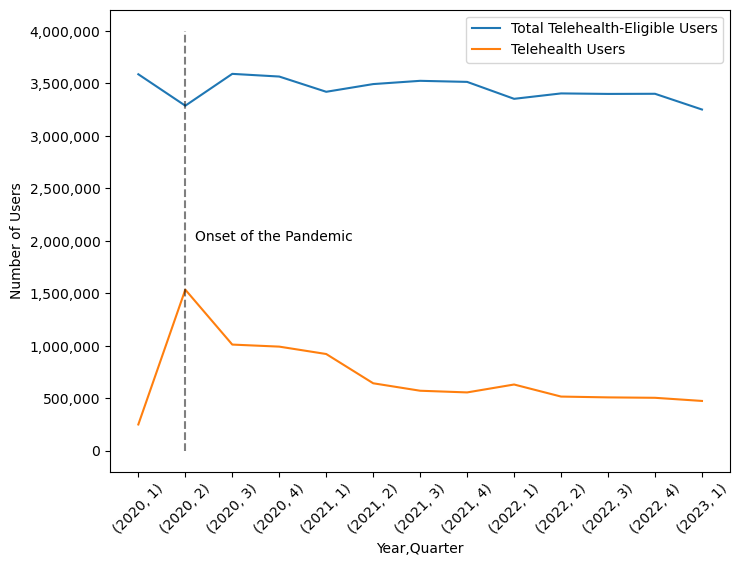

In [8]:
# Create line chart to demonstrate telehealth-eligible users and telehealth users across quarters
user_chart = mean_users.plot(kind = "line", figsize=(8,6), 
                             rot=45, xticks=range(len(mean_users.index)))              
plt.ylabel("Number of Users")

# format nubmers on axes
# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
user_chart.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# make a vertical line to annotate the chart with the onset of the pandemic
user_chart.annotate("Onset of the Pandemic", xy=(1.2,2000000))
plt.vlines(1,0,4000000, alpha=0.5, color='black', linestyles='dashed')

# show chart
plt.show()

In [9]:
# export chart as image
# https://stackoverflow.com/questions/19555525/saving-plots-axessubplot-generated-from-python-pandas-with-matplotlibs-savefi
user_chart.figure.savefig("usersLine.png")

In [10]:
# Group data by year only instead of both year and quarter, find average number of users per year
year_national = national.set_index("Year")
users_sum = year_national.groupby("Year")["Telehealth Users"].mean()
total_users_mean = year_national.groupby("Year")["Total Telehealth-Eligible Users"].mean()

In [11]:
# create new data frame with average telemedicine users by year for plotting
df =  pd.DataFrame({"Total Users" : users_sum,
                    "Total Eligible Users" : total_users_mean,
                   })
df

,Total Users,Total Eligible Users
Year,,
2020,"945,115","3,504,517"
2021,"671,020","3,484,977"
2022,"538,088","3,386,488"
2023,"472,614","3,248,098"


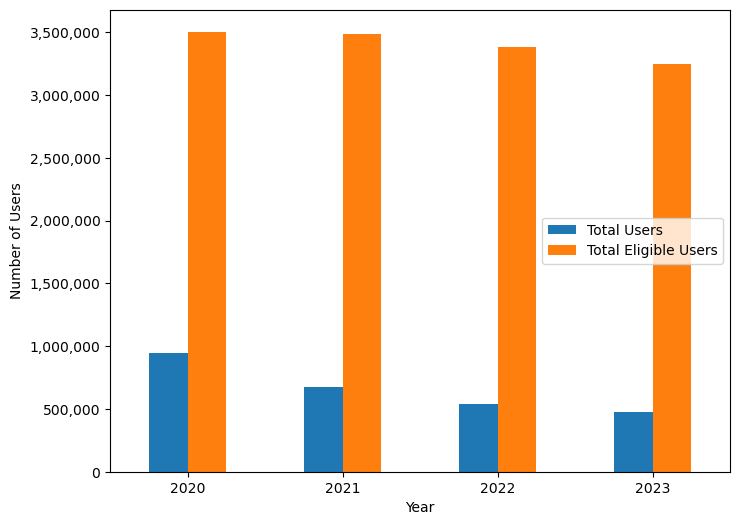

In [12]:
# plot yearly average data
ax = df.plot(kind="bar", rot='horizontal', figsize=(8,6), ylabel="Number of Users")
plt.legend(loc='center right')

# format nubmers on axes
# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# show chart
plt.show()

In [13]:
# export chart as image file
# https://stackoverflow.com/questions/19555525/saving-plots-axessubplot-generated-from-python-pandas-with-matplotlibs-savefi
ax.figure.savefig("usersBar.png")